### Importando bibliotecas para uso

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Extraindo o dataset e o transformando para melhor análise

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
df = pd.read_json(url)

In [3]:
df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.isnull().sum()

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [5]:
customer_df = pd.json_normalize(df['customer'])
phone_df = pd.json_normalize(df['phone'])
internet_df = pd.json_normalize(df['internet'])
account_df = pd.json_normalize(df['account'])

In [6]:
df_final = pd.concat([df['customerID'], df['Churn'],
                      customer_df, phone_df, internet_df, account_df], axis=1)

In [7]:
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_final['Churn'].value_counts()

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [9]:
df_final['Churn'] = df_final['Churn'].replace(r'^\s*$', np.nan, regex=True)

df_final = df_final.dropna(subset=['Churn'])

In [10]:
for col in df_final.columns:
    print(df_final[col].value_counts(dropna=False))
    print("\n")

customerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64


Churn
No     5174
Yes    1869
Name: count, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No   

In [11]:
df_final['Charges.Total'] = df_final['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)

df_final = df_final.dropna(subset=['Charges.Total'])

In [12]:
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')

bins = [0, 500, 1000, 1500, 2000, 3000, 5000, df_final['Charges.Total'].max()+1]
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-3000', '3001-5000', '5000+']

df_final['ChargesTotal_Faixa'] = pd.cut(df_final['Charges.Total'], bins=bins, labels=labels, include_lowest=True)

In [13]:
df_final.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Distribuição da Evasão

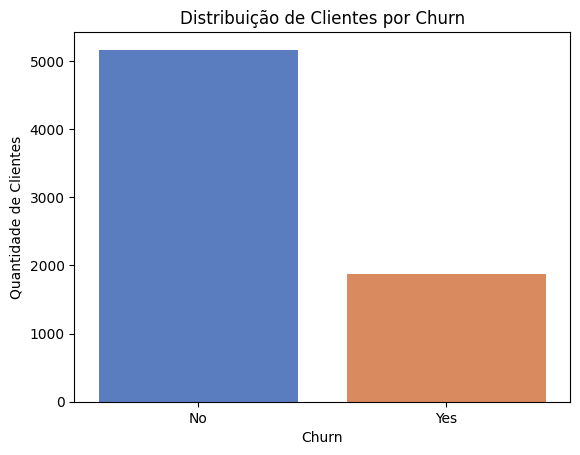

In [14]:
sns.countplot(data=df_final, x='Churn', hue='Churn', palette='muted', legend=False)
plt.title('Distribuição de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.show()

### Contagem de Evasão: Variáveis Categóricas

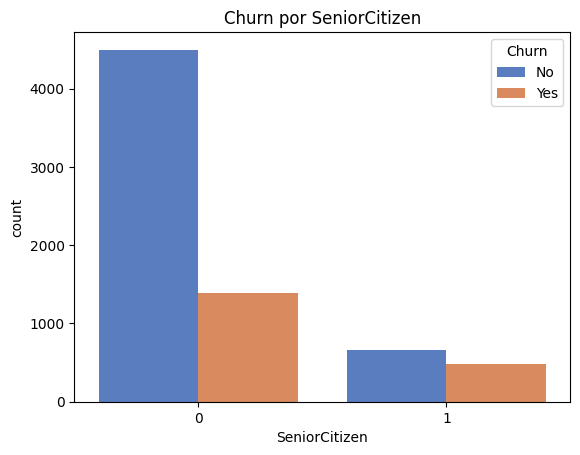

In [15]:
sns.countplot(x='SeniorCitizen', hue='Churn',data=df_final, palette='muted')
plt.title('Churn por SeniorCitizen')
plt.show()

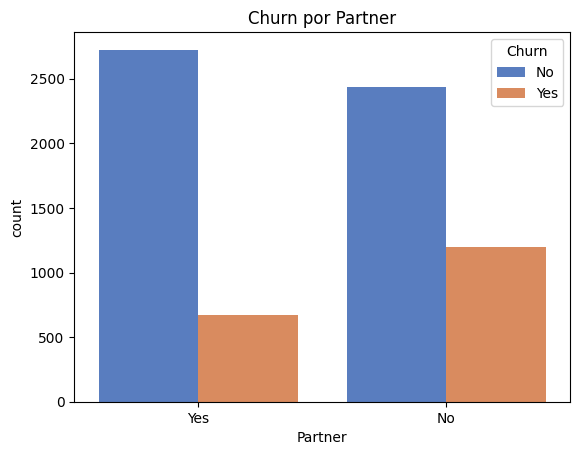

In [16]:
sns.countplot(x='Partner', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por Partner')
plt.show()

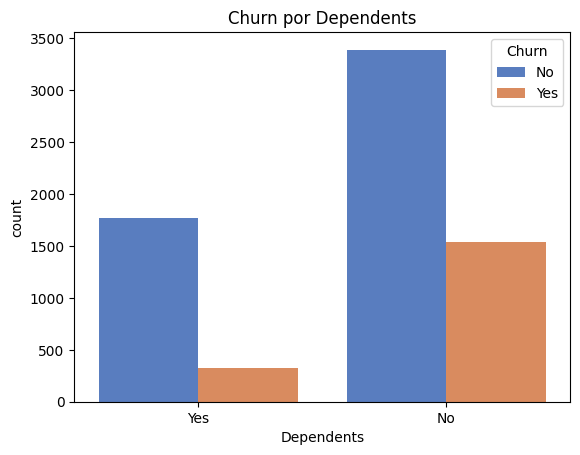

In [17]:
sns.countplot(x='Dependents', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por Dependents')
plt.show()

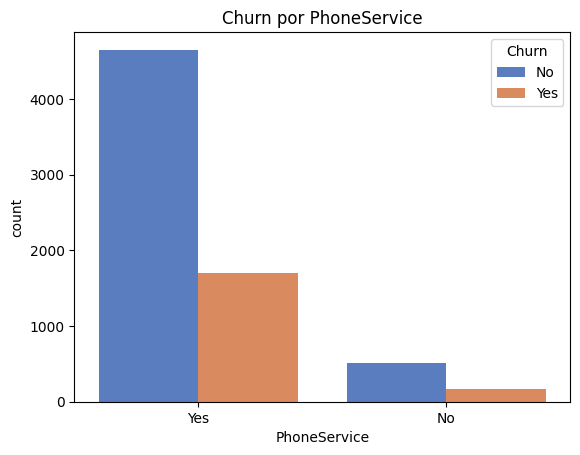

In [18]:
sns.countplot(x='PhoneService', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por PhoneService')
plt.show()

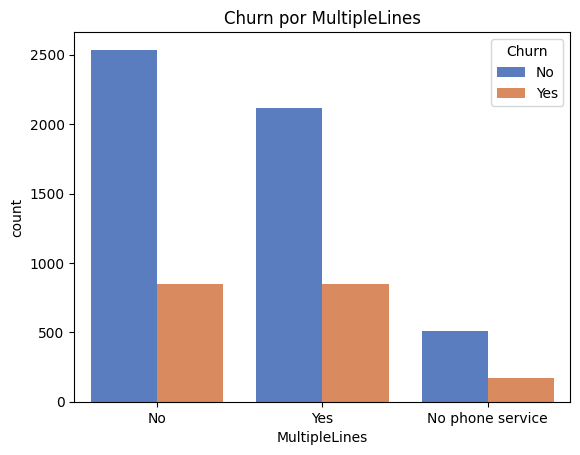

In [19]:
sns.countplot(x='MultipleLines', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por MultipleLines')
plt.show()

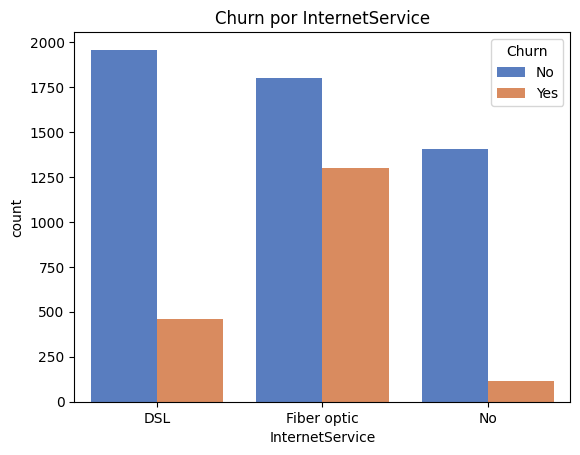

In [20]:
sns.countplot(x='InternetService', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por InternetService')
plt.show()

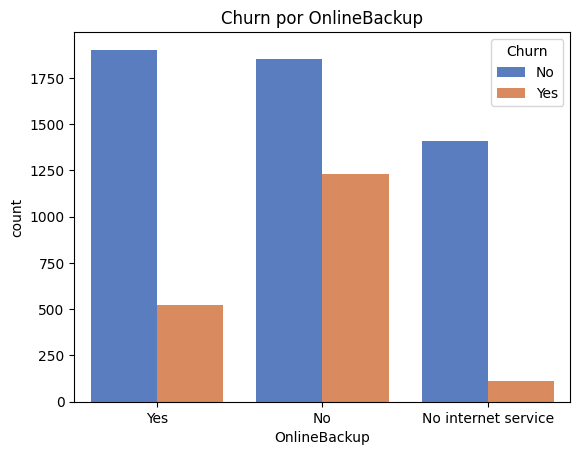

In [21]:
sns.countplot(x='OnlineBackup', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por OnlineBackup')
plt.show()

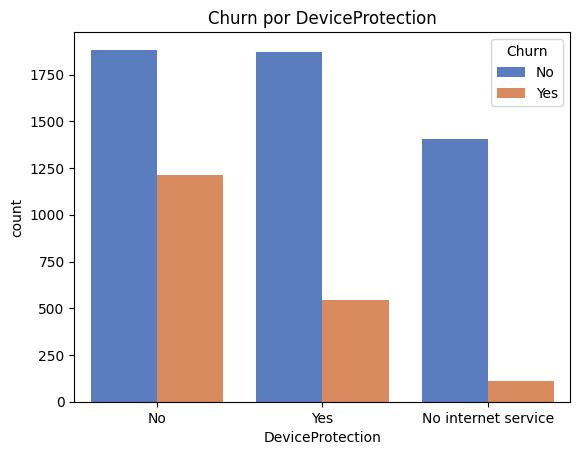

In [22]:
sns.countplot(x='DeviceProtection', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por DeviceProtection')
plt.show()

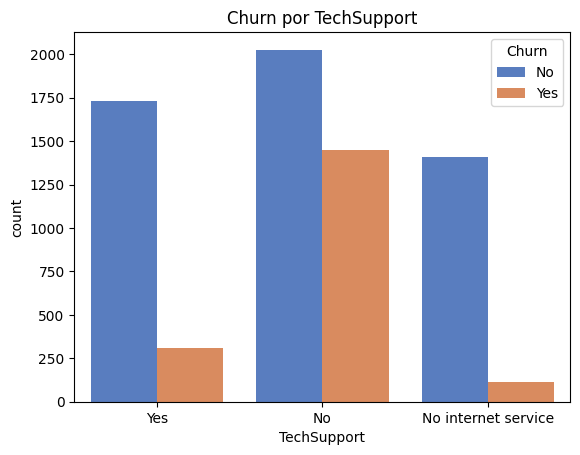

In [23]:
sns.countplot(x='TechSupport', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por TechSupport')
plt.show()

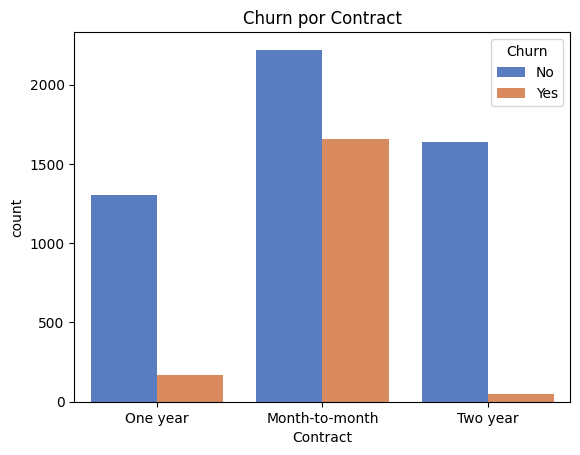

In [24]:
sns.countplot(x='Contract', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por Contract')
plt.show()

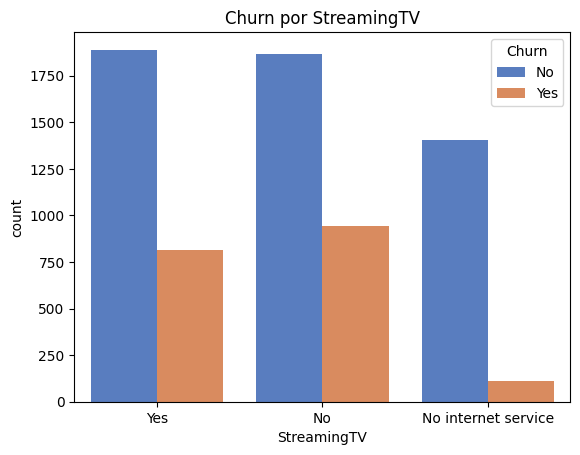

In [25]:
sns.countplot(x='StreamingTV', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por StreamingTV')
plt.show()

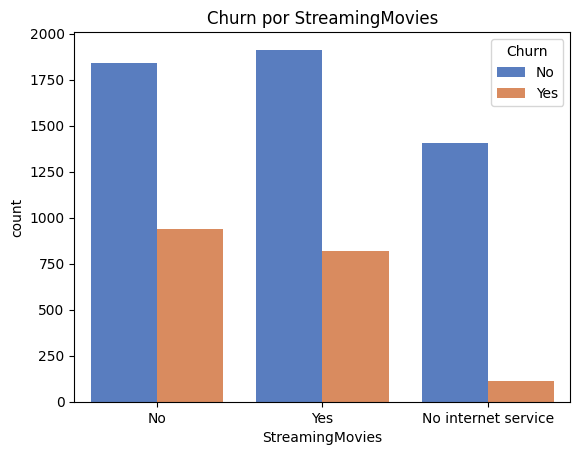

In [26]:
sns.countplot(x='StreamingMovies', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por StreamingMovies')
plt.show()

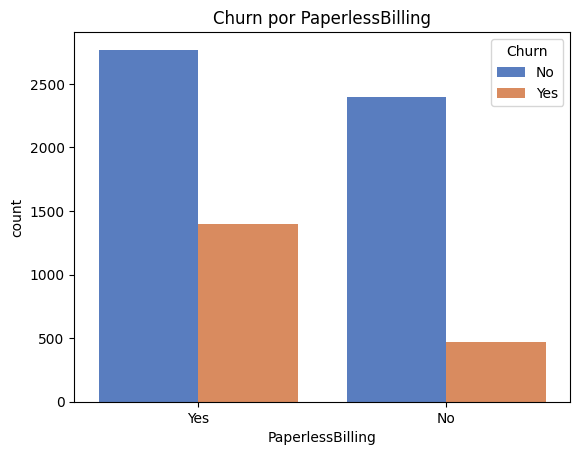

In [27]:
sns.countplot(x='PaperlessBilling', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por PaperlessBilling')
plt.show()

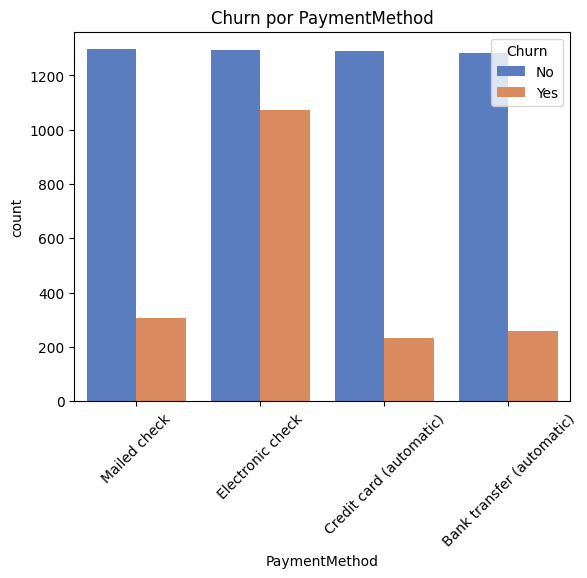

In [28]:
sns.countplot(x='PaymentMethod', hue='Churn', data=df_final, palette='muted')
plt.title('Churn por PaymentMethod')
plt.xticks(rotation=45)
plt.show()

### Contagem de Evasão: Variáveis Numéricas

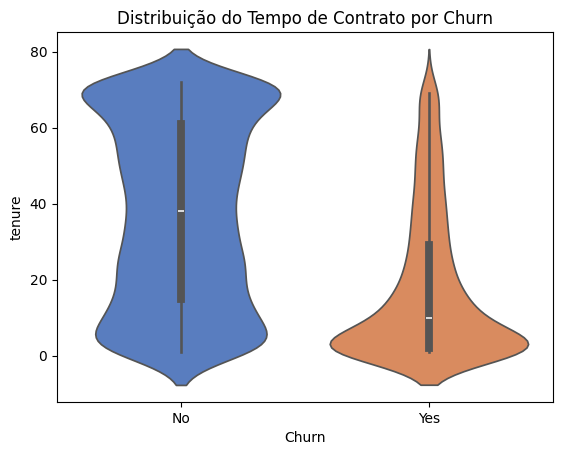

In [29]:
sns.violinplot(x='Churn', y='tenure',hue='Churn',data=df_final, palette='muted')
plt.title('Distribuição do Tempo de Contrato por Churn')
plt.show()

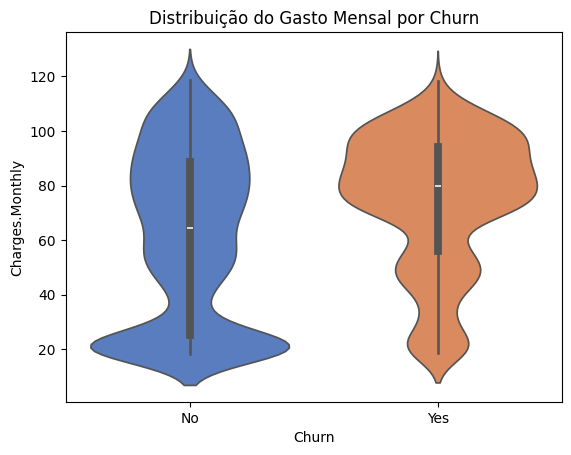

In [30]:
sns.violinplot(x='Churn', y='Charges.Monthly',hue='Churn', data=df_final, palette='muted')
plt.title('Distribuição do Gasto Mensal por Churn')
plt.show()

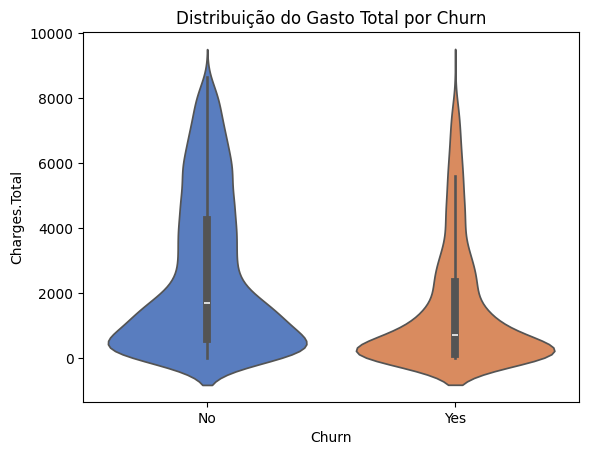

In [31]:
sns.violinplot(x='Churn', y='Charges.Total',hue='Churn', data=df_final, palette='muted')
plt.title('Distribuição do Gasto Total por Churn')
plt.show()

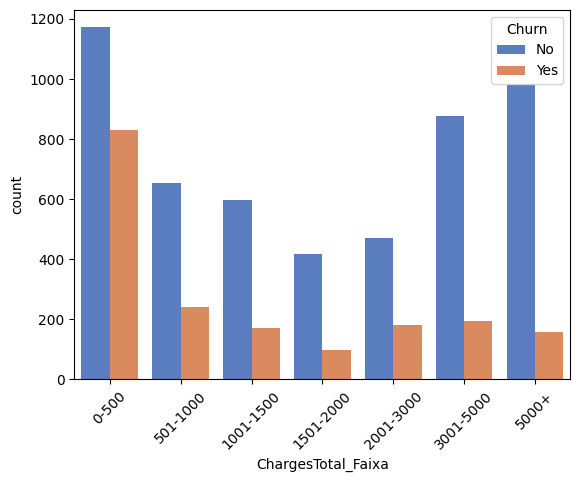

In [33]:
sns.countplot(data=df_final, x='ChargesTotal_Faixa', hue='Churn', palette='muted')
plt.xticks(rotation=45)
plt.show()

### Relatório de Análise de Evasão de Clientes (Churn)

1. 
1. Introdução
Esta análise tem como objetivo entender quais fatores estão ligados à saída de clientes (churn) em uma empresa do setor de telecomunicações. A perda de clientes é um desafio importante que afeta diretamente os lucros e a continuidade do negócio. Reconhecer os perfis e comportamentos dos clientes que tendem a cancelar o serviço permite à empresa adotar estratégias eficazes para manter esses clientes e minimizar perdas financeiras.

2. Limpeza e Preparação dos Dados
Os dados foram inicialmente carregados e examinados para garantir sua qualidade e coerência.

Foram tratados valores faltantes e inconsistências:

Valores ausentes, especialmente na variável alvo (Churn), foram removidos ou substituídos.

Colunas que deveriam ser numéricas, mas estavam como texto, foram convertidas para o formato correto, facilitando análises quantitativas.

Categorias foram uniformizadas, e informações que não contribuíam para a análise foram descartadas, focando apenas nos dados relevantes.

3. Análise Exploratória dos Dados (EDA)
Distribuição geral do churn
Foi feita uma visualização para mostrar a proporção entre clientes que continuaram e que cancelaram o serviço. Cerca de 25% dos clientes deixaram a empresa, o que representa um problema significativo.

Análise de variáveis categóricas
Foram investigadas características como tipo de contrato, forma de pagamento, serviços adicionais contratados e tipo de conexão. Os principais pontos observados foram:

Clientes com contrato mensal (month-to-month) apresentaram taxas de cancelamento muito maiores.

A evasão foi mais frequente entre clientes com conexão por fibra óptica.

Clientes que não contrataram serviços extras como backup de dados, proteção de dispositivos ou suporte técnico tiveram maior propensão a cancelar.

Análise de variáveis numéricas
Clientes com menor tempo de contrato (tenure) tendem a sair mais cedo.
Ao segmentar o total gasto (Charges.Total) em grupos, percebeu-se que o churn foi mais alto entre aqueles que gastaram até R$ 500, sugerindo que esses clientes podem não perceber valor suficiente no serviço ou usam pouco.

Visualizações
Gráficos de barras e violin plots foram usados para mostrar as distribuições e destacar diferenças entre grupos.

4. Conclusões e Principais Descobertas
Contratos mensais têm forte relação com maior evasão.

Embora a fibra óptica ofereça melhor tecnologia, seus clientes apresentam taxas maiores de churn.

Clientes que não utilizam serviços complementares cancelam mais frequentemente.

Tempo curto de contrato e baixo gasto total também são indicadores de maior cancelamento.

Fatores como gênero e senioridade mostraram influência menor na evasão.

5. Recomendações
Direcionar esforços para reter clientes com contratos mensais, incentivando migração para contratos anuais ou com fidelidade.

Oferecer vantagens ou descontos para clientes que ainda não possuem serviços extras como backup, proteção e suporte.

Desenvolver ações específicas para clientes de fibra óptica, destacando os benefícios do serviço para reduzir cancelamentos.

Monitorar mais atentamente clientes com pouco tempo de contrato e baixo gasto, promovendo campanhas de engajamento nos primeiros meses.

Avaliar o uso de modelos preditivos para identificar clientes com alto risco de churn e agir preventivamente.

FIM DO RELATÓRIO.

### Extra: Análise de Correlação entre Variáveis

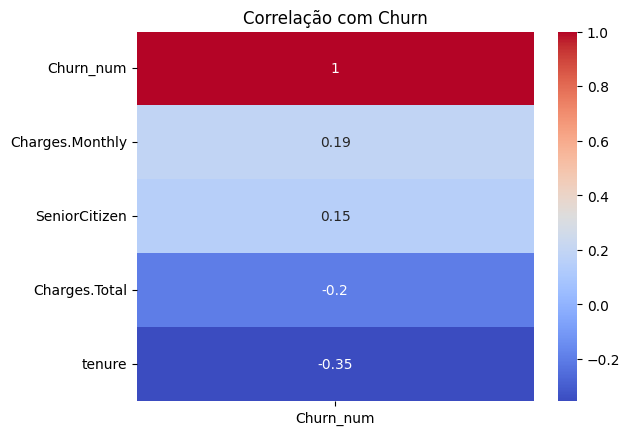

In [34]:
df_final['Churn_num'] = df_final['Churn'].map({'No': 0, 'Yes': 1})

numericas = df_final.select_dtypes(include='number')

corr = numericas.corr()

sns.heatmap(corr[['Churn_num']].sort_values(by='Churn_num', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlação com Churn')
plt.show()